In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def conversionOdds(odds):
    if(odds < 0):
        return (100 / (odds * -1)) + 1
    else:
        return (odds / 100) + 1

# Single Bet Methods

In [179]:
# Returns a Dataframe that gets all of the combinations with the given Odds
def single_bet_payouts(favorite_odds, upset_odds, total_amt):
    favorite_multi = conversionOdds(favorite_odds)
    upset_multi = conversionOdds(upset_odds)
    risk_df = pd.DataFrame()
    risk_df['Risk for Favorite'] = np.arange(0, total_amt, 1)
    risk_df['Risk for Favorite'] = risk_df['Risk for Favorite'].round(decimals = 2)
    risk_df['Risk for Upset'] = risk_df.apply(lambda row: total_amt - row)
    risk_df['Risk for Upset'] = risk_df['Risk for Upset'].round(decimals = 2)
    risk_df['Favorite Payout'] = risk_df['Risk for Favorite'].apply(lambda row: favorite_multi*row)
    risk_df['Upset Payout'] = risk_df['Risk for Upset'].apply(lambda row: upset_multi*row)
    risk_df['Favorite Wins Balance'] = risk_df['Favorite Payout'] - total_amt
    risk_df['Upset Wins Balance'] = risk_df['Upset Payout'] - total_amt
    return risk_df

# Gets the combinations from the single bet combinations that results in a positive regardless of the result
def get_positive_combinations(df):
    positive_df = df.loc[df['Favorite Wins Balance'] > 0]
    positive_df = positive_df.loc[df['Upset Wins Balance'] > 0]
    return positive_df

# Displays a plot of the dataframe given
# Will show two bar graphs, one for the difference if the favorite wins given the risk
# and one for the diffference if the upset wins given the risk
def display_single_bet_payout_distribution(risk_df):
    X_axis = np.arange(len(risk_df['Risk for Upset']))
  
    plt.bar(X_axis - 0.2, risk_df['Favorite Wins Balance'], 0.4, label = 'Balance if Favorite Wins')
    plt.bar(X_axis + 0.2, risk_df['Upset Wins Balance'], 0.4, label = 'Balance if Upset Wins')

    plt.xticks(X_axis, risk_df['Risk for Upset'])
    plt.xlabel("Risk for Upset")
    plt.xticks(rotation=90, fontsize=8)
    plt.ylabel("Payout")
    plt.title("Hedging a Specific amount of Money")
    plt.legend()
    plt.figure(figsize=(20,12))
    plt.show()

In [182]:
df = single_bet_payouts(191, 361, 10)
df

,Risk for Favorite,Risk for Upset,Favorite Payout,Upset Payout,Favorite Wins Balance,Upset Wins Balance
0,0,10,0.00,46.10,-10.00,36.10
1,1,9,2.91,41.49,-7.09,31.49
2,2,8,5.82,36.88,-4.18,26.88
3,3,7,8.73,32.27,-1.27,22.27
4,4,6,11.64,27.66,1.64,17.66
5,5,5,14.55,23.05,4.55,13.05
6,6,4,17.46,18.44,7.46,8.44
7,7,3,20.37,13.83,10.37,3.83
8,8,2,23.28,9.22,13.28,-0.78
9,9,1,26.19,4.61,16.19,-5.39


In [183]:
positive_df = get_positive_combinations(df)
positive_df

,Risk for Favorite,Risk for Upset,Favorite Payout,Upset Payout,Favorite Wins Balance,Upset Wins Balance
4,4,6,11.64,27.66,1.64,17.66
5,5,5,14.55,23.05,4.55,13.05
6,6,4,17.46,18.44,7.46,8.44
7,7,3,20.37,13.83,10.37,3.83


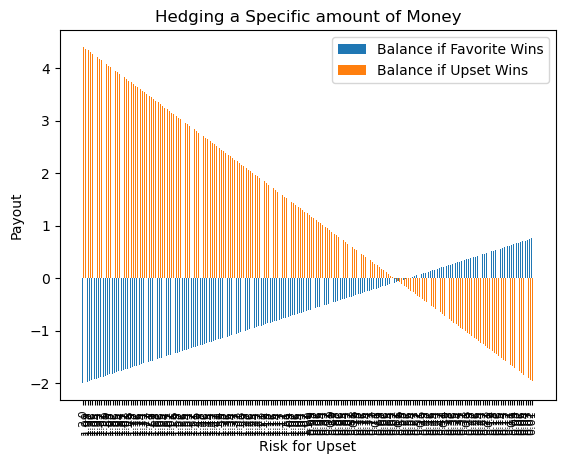

<Figure size 2000x1200 with 0 Axes>

In [224]:
display_single_bet_payout_distribution(df)

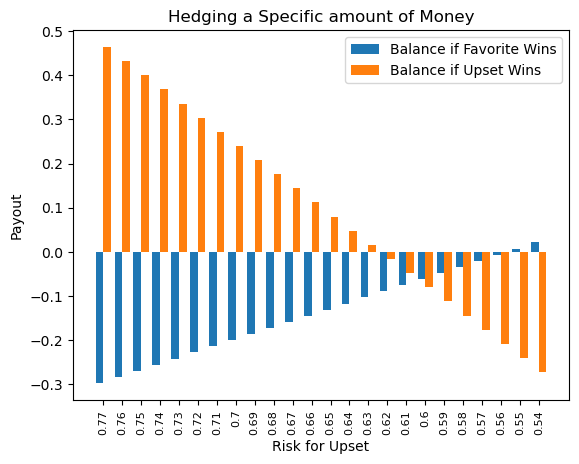

<Figure size 2000x1200 with 0 Axes>

In [225]:
display_single_bet_payout_distribution(positive_df)

# 3 Way Moneyline Combinations

In [153]:
def get_threeway_df(total_amt):
    # Create a Dataframe that has all the possible percentage allocations with 3 way moneylines
    data = {
        '% for 1': [],
        '% for 2': [],
        '% for 3': [],
    }
    three_way_df = pd.DataFrame(data)
    for i in range(1,total_amt*100 + 1):
        for j in range(1,total_amt*100 + 1):
            new_row = {
                '% for 1': i/100,
                '% for 2': j/100,
                '% for 3': (total_amt*100-i-j)/100,
            }
            if(i/100 + j/100 < total_amt):
                three_way_df.loc[len(three_way_df)] = new_row
    return three_way_df

In [154]:
three_way_df = get_threeway_df(2)
three_way_df

,% for 1,% for 2,% for 3
0,0.01,0.01,1.98
1,0.01,0.02,1.97
2,0.01,0.03,1.96
3,0.01,0.04,1.95
4,0.01,0.05,1.94
...,...,...,...
19696,1.96,0.02,0.02
19697,1.96,0.03,0.01
19698,1.97,0.01,0.02
19699,1.97,0.02,0.01


In [186]:
# Returns a Dataframe that gets all of the combinations with the given Odds
def threeway_bet_payouts(favorite_odds, upset_odds, draw_odds, total_amt):
    risk_df = get_threeway_df(total_amt)
    favorite_multi = conversionOdds(favorite_odds)
    upset_multi = conversionOdds(upset_odds)
    draw_multi = conversionOdds(draw_odds)
    
    risk_df = risk_df.rename(columns={"% for 1": "Risk for Favorite", "% for 2": "Risk for Upset", "% for 3": "Risk for Draw"})
    
    risk_df['Risk for Favorite'] = risk_df['Risk for Favorite'].apply(lambda row: round(row, 2))
    risk_df['Risk for Upset'] = risk_df['Risk for Upset'].apply(lambda row: round(row, 2))
    risk_df['Risk for Draw'] = risk_df['Risk for Draw'].apply(lambda row: round(row, 2))
    
    risk_df['Favorite Payout'] = risk_df['Risk for Favorite'].apply(lambda row: favorite_multi*row)
    risk_df['Upset Payout'] = risk_df['Risk for Upset'].apply(lambda row: upset_multi*row)
    risk_df['Draw Payout'] = risk_df['Risk for Draw'].apply(lambda row: draw_multi*row)

    risk_df['Favorite Wins Balance'] = risk_df['Favorite Payout'] - total_amt
    risk_df['Upset Wins Balance'] = risk_df['Upset Payout'] - total_amt
    risk_df['Draw Wins Balance'] = risk_df['Draw Payout'] - total_amt
    
    return risk_df

# Gets the combinations from the single bet combinations that results in a positive regardless of the result
def get_positive_combinations(df, to_lose):
    positive_df = df.loc[df['Favorite Wins Balance'] >= (-1*to_lose)]
    positive_df = positive_df.loc[df['Upset Wins Balance'] >= (-1*to_lose)]
    positive_df = positive_df.loc[df['Draw Wins Balance'] >= (-1*to_lose)]
    return positive_df

# Displays a plot of the dataframe given
# Will show two bar graphs, one for the difference if the favorite wins given the risk
# and one for the diffference if the upset wins given the risk
def display_single_bet_payout_distribution(risk_df):
    X_axis = np.arange(len(risk_df['Risk for Upset']))
  
    plt.bar(X_axis, risk_df['Favorite Wins Balance'], 0.4, label = 'Balance if Favorite Wins')
    plt.bar(X_axis+0.2, risk_df['Upset Wins Balance'], 0.4, label = 'Balance if Upset Wins')
    plt.bar(X_axis+0.2*2, risk_df['Draw Wins Balance'], 0.4, label = 'Balance if Draw Wins')    

    plt.xticks(X_axis, risk_df['Risk for Upset'])
    plt.xlabel("Risk for Upset")
    plt.xticks(rotation=90, fontsize=8)
    plt.ylabel("Payout")
    plt.title("Hedging a Specific amount of Money")
    plt.legend()
    plt.figure(figsize=(200,120))
    plt.show()

In [195]:
threeway_bet_df = threeway_bet_payouts(352, 310, 204, 1)
threeway_bet_df

,Risk for Favorite,Risk for Upset,Risk for Draw,Favorite Payout,Upset Payout,Draw Payout,Favorite Wins Balance,Upset Wins Balance,Draw Wins Balance
0,0.01,0.01,0.98,0.0452,0.041,2.9792,-0.9548,-0.959,1.9792
1,0.01,0.02,0.97,0.0452,0.082,2.9488,-0.9548,-0.918,1.9488
2,0.01,0.03,0.96,0.0452,0.123,2.9184,-0.9548,-0.877,1.9184
3,0.01,0.04,0.95,0.0452,0.164,2.8880,-0.9548,-0.836,1.8880
4,0.01,0.05,0.94,0.0452,0.205,2.8576,-0.9548,-0.795,1.8576
...,...,...,...,...,...,...,...,...,...
4846,0.96,0.02,0.02,4.3392,0.082,0.0608,3.3392,-0.918,-0.9392
4847,0.96,0.03,0.01,4.3392,0.123,0.0304,3.3392,-0.877,-0.9696
4848,0.97,0.01,0.02,4.3844,0.041,0.0608,3.3844,-0.959,-0.9392
4849,0.97,0.02,0.01,4.3844,0.082,0.0304,3.3844,-0.918,-0.9696


In [202]:
positive_3_df = get_positive_combinations(threeway_bet_df, -0.20)
positive_3_df

,Risk for Favorite,Risk for Upset,Risk for Draw,Favorite Payout,Upset Payout,Draw Payout,Favorite Wins Balance,Upset Wins Balance,Draw Wins Balance
2252,0.27,0.30,0.43,1.2204,1.230,1.3072,0.2204,0.230,0.3072
2253,0.27,0.31,0.42,1.2204,1.271,1.2768,0.2204,0.271,0.2768
2254,0.27,0.32,0.41,1.2204,1.312,1.2464,0.2204,0.312,0.2464
2255,0.27,0.33,0.40,1.2204,1.353,1.2160,0.2204,0.353,0.2160
2324,0.28,0.30,0.42,1.2656,1.230,1.2768,0.2656,0.230,0.2768
2325,0.28,0.31,0.41,1.2656,1.271,1.2464,0.2656,0.271,0.2464
2326,0.28,0.32,0.40,1.2656,1.312,1.2160,0.2656,0.312,0.2160
2395,0.29,0.30,0.41,1.3108,1.230,1.2464,0.3108,0.230,0.2464
2396,0.29,0.31,0.40,1.3108,1.271,1.2160,0.3108,0.271,0.2160
2465,0.30,0.30,0.40,1.3560,1.230,1.2160,0.3560,0.230,0.2160


In [201]:
positive_3_df.sort_values(by='Draw Wins Balance', ascending=False)

,Risk for Favorite,Risk for Upset,Risk for Draw,Favorite Payout,Upset Payout,Draw Payout,Favorite Wins Balance,Upset Wins Balance,Draw Wins Balance
2102,0.25,0.27,0.48,1.1300,1.107,1.4592,0.1300,0.107,0.4592
2103,0.25,0.28,0.47,1.1300,1.148,1.4288,0.1300,0.148,0.4288
2176,0.26,0.27,0.47,1.1752,1.107,1.4288,0.1752,0.107,0.4288
2177,0.26,0.28,0.46,1.1752,1.148,1.3984,0.1752,0.148,0.3984
2104,0.25,0.29,0.46,1.1300,1.189,1.3984,0.1300,0.189,0.3984
...,...,...,...,...,...,...,...,...,...
2536,0.31,0.32,0.37,1.4012,1.312,1.1248,0.4012,0.312,0.1248
2258,0.27,0.36,0.37,1.2204,1.476,1.1248,0.2204,0.476,0.1248
2468,0.30,0.33,0.37,1.3560,1.353,1.1248,0.3560,0.353,0.1248
2329,0.28,0.35,0.37,1.2656,1.435,1.1248,0.2656,0.435,0.1248


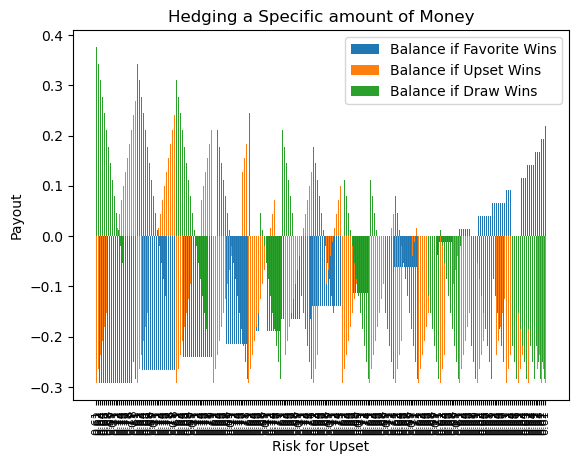

<Figure size 20000x12000 with 0 Axes>

In [53]:
display_single_bet_payout_distribution(positive_3_df)

# Parlay Hedging

In [13]:
parlay_info = {
    'leg1fOdds': -145,
    'leg1uOdds': 120,
    'leg2fOdds': -225,
    'leg2uOdds': 180,
}
parlay_info

{'leg1fOdds': -145, 'leg1uOdds': 120, 'leg2fOdds': -225, 'leg2uOdds': 180}

In [14]:
parlay_data = {
        'Leg 1 Odds': [],
        'Leg 2 Odds': [],
    }
parlay_combo_df = pd.DataFrame(parlay_data)

print(parlay_combo_df)
# pair_order_list = itertools.combinations(parlay.values(), 2)

for odds1 in parlay_info.keys():
    for odds2 in parlay_info.keys():
        if(odds1[:4] == odds2[:4]):
            break;
        else:
            new_row = {
                'Leg 1 Odds': parlay_info[odds2],
                'Leg 2 Odds': parlay_info[odds1],
            }
            parlay_combo_df.loc[len(parlay_combo_df)] = new_row
            
                
parlay_combo_df

Empty DataFrame
Columns: [Leg 1 Odds, Leg 2 Odds]
Index: []


,Leg 1 Odds,Leg 2 Odds
0,-145,-225
1,120,-225
2,-145,180
3,120,180


In [5]:
leg1 = {'fo' : -145, 'uo' : 120}
leg2 = {'fo' : -225, 'uo' : 180}
leg3 = {'fo' : -600, 'uo' : 300}
leg4 = {'fo' : -124, 'uo' : 110}
leg5 = {'fo' : -1000, 'uo' : 3000}

parlay = [leg1, leg2]

g_index = 0
parlay_len = len(parlay)


def create_combinations(parlay, combos):
    global g_index
    global parlay_len
    if(len(parlay) == 1):
        keys = list(parlay[0].keys())
        for i in range(0, len(keys)):
            value = parlay[0][keys[i]]
            if(i < len(keys) - 1):
                copy_row(combos)
            combos[g_index].append(value)
            g_index += 1
    
        
        if(len(combos) != g_index):
            g_index -= 1
            copy_row(combos)
            combos[g_index+1].pop()
            g_index += 1
             
    else:
        keys = list(parlay[0].keys())
        for i in range(0, len(keys)):
            value = parlay[0][keys[i]]
            if(len(combos[g_index]) <= parlay_len - 2):
                combos[g_index].append(value)
            else:
                combos[g_index].pop()
                combos[g_index].append(value)  
            
            create_combinations(parlay[1:], combos)
            if(len(combos) > g_index and combos[g_index]):
                combos[g_index].pop()
    
    return combos
            


def copy_row(combos):
    new_index = g_index + 1

    for item in combos[g_index]:
        combos[new_index].append(item)

def create_parlay_df(parlay):
    
    # Setting up the dataframe
    parlay_dict = {}
    for leg_num in range(1, len(parlay) + 1):
        parlay_dict['Leg ' + str(leg_num) + ' Odds'] = []
    
    parlay_combo_df = pd.DataFrame(parlay_dict)
    
    combos = []
    num_combos = 1
    for leg in parlay:
        num_combos *= len(leg.keys())
        
    for i in range(0, num_combos): combos.append([])
    
    parlay_df = get_combinations(parlay, combos, parlay_dict, parlay_combo_df)
    
    index_list = []
    for i in range(0, len(parlay_df.index)):
        index_list.append('Parlay ' + str(i+1))
    
    parlay_df['Index'] = index_list
    parlay_df.set_index("Index", inplace=True)
    
    parlay_df['Total Decimal Odds'] = 1
    
    return parlay_df

def get_combinations(parlay, combos, parlay_dict, parlay_combo_df):
                
    combos = create_combinations(parlay, combos)
    
    for combo in combos:
        new_row = {}
        keys_list = list(parlay_dict.keys())
        for index in range(0, len(parlay_dict.keys())):
            new_row[keys_list[index]] = combo[index]
        
        parlay_combo_df.loc[len(parlay_combo_df)] = new_row
        
    
    return parlay_combo_df

df = create_parlay_df(parlay)
df

,Leg 1 Odds,Leg 2 Odds,Total Decimal Odds
Index,,,
Parlay 1,-145,-225,1
Parlay 2,-145,180,1
Parlay 3,120,-225,1
Parlay 4,120,180,1


In [16]:
def add_parlay_odds(parlay_df):
    columns = parlay_df.columns
    for col in columns[:-1]:
        parlay_df['Total Decimal Odds'] = parlay_df[col].apply(lambda row: conversionOdds(row)) * parlay_df['Total Decimal Odds'].apply(lambda row: row)
    parlay_df['Total Decimal Odds'] = parlay_df['Total Decimal Odds'].apply(lambda row: round(row,2))
    return parlay_df

odds_df = add_parlay_odds(df)
odds_df

,Leg 1 Odds,Leg 2 Odds,Total Decimal Odds
Index,,,
Parlay 1,-145,-225,2.44
Parlay 2,-145,180,4.73
Parlay 3,120,-225,3.18
Parlay 4,120,180,6.16


In [17]:
parlay_list = odds_df.index.tolist()

data_dict = {
    'Risk for 1': [], 
    'Risk for 2': [],
    'Risk for 3': [],
    'Risk for 4': []
}

allocation_df = pd.DataFrame(data_dict)

total_allocation = 1
step = 0.1

def allocate(num_parlays, row, index):
    if index == num_parlays - 1:
        row[index] = total_allocation - sum(row)
        allocation_df.loc[len(allocation_df)] = row
        row[index] = 0

    else:
        for i in np.arange(0, total_allocation + step, step):
            row[index] = i
            if(sum(row) > total_allocation):
                row[index] = 0
                break
            else:
                allocate(num_parlays, row, index + 1)
                row[index] = 0
            


allocate(4, [0,0,0,0], 0)
allocation_df

,Risk for 1,Risk for 2,Risk for 3,Risk for 4
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.1,0.9
2,0.0,0.0,0.2,0.8
3,0.0,0.0,0.3,0.7
4,0.0,0.0,0.4,0.6
...,...,...,...,...
277,0.8,0.2,0.0,0.0
278,0.9,0.0,0.0,0.1
279,0.9,0.0,0.1,0.0
280,0.9,0.1,0.0,0.0


In [18]:
def add_payouts_balances(allocation_df, odds_df, total_allocation):
    odds_list = list(odds_df['Total Decimal Odds'])
    for i in range(0, len(odds_list)):
        print(odds_list[i])
        allocation_df['Parlay ' + str(i+1) + ' Payout'] = allocation_df['Risk for ' + str(i+1)].apply(lambda row: row*odds_list[i])
    
    for i in range(4, len(odds_list)+4):
        allocation_df['Parlay ' + str(i-3) + ' Balance Change'] = allocation_df['Parlay ' + str(i-3) + ' Payout'].apply(lambda row: row - total_allocation)
    
    return allocation_df

a_df = add_payouts_balances(allocation_df, odds_df, 1)
a_df

2.44
4.73
3.18
6.16


,Risk for 1,Risk for 2,Risk for 3,Risk for 4,Parlay 1 Payout,Parlay 2 Payout,Parlay 3 Payout,Parlay 4 Payout,Parlay 1 Balance Change,Parlay 2 Balance Change,Parlay 3 Balance Change,Parlay 4 Balance Change
0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,6.160,-1.000,-1.000,-1.000,5.160
1,0.0,0.0,0.1,0.9,0.000,0.000,0.318,5.544,-1.000,-1.000,-0.682,4.544
2,0.0,0.0,0.2,0.8,0.000,0.000,0.636,4.928,-1.000,-1.000,-0.364,3.928
3,0.0,0.0,0.3,0.7,0.000,0.000,0.954,4.312,-1.000,-1.000,-0.046,3.312
4,0.0,0.0,0.4,0.6,0.000,0.000,1.272,3.696,-1.000,-1.000,0.272,2.696
...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.8,0.2,0.0,0.0,1.952,0.946,0.000,0.000,0.952,-0.054,-1.000,-1.000
278,0.9,0.0,0.0,0.1,2.196,0.000,0.000,0.616,1.196,-1.000,-1.000,-0.384
279,0.9,0.0,0.1,0.0,2.196,0.000,0.318,0.000,1.196,-1.000,-0.682,-1.000
280,0.9,0.1,0.0,0.0,2.196,0.473,0.000,0.000,1.196,-0.527,-1.000,-1.000


In [35]:
# def get_positive_combinations(df):
#     positive_df = df.loc[df['Favorite Wins Balance'] > 0]
#     positive_df = positive_df.loc[df['Upset Wins Balance'] > 0]
#     return positive_df
def get_positive_parlays(allocation_df):
    positive_df = allocation_df
    
    columns = list(allocation_df.columns)
    columns = filter(lambda col: col.__contains__('Balance'), columns)
    for col in columns :
        print(col)
        positive_df = positive_df[allocation_df[col] >= -0.40]

    return positive_df

pos_df = get_positive_parlays(allocation_df)
pos_df

Parlay 1 Balance Change
Parlay 2 Balance Change
Parlay 3 Balance Change
Parlay 4 Balance Change


/var/folders/yh/dn70_y6x0jvfw0v1v0vpc3hc0000gn/T/ipykernel_30756/1241356397.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_df = positive_df[allocation_df[col] >= -0.40]


,Risk for 1,Risk for 2,Risk for 3,Risk for 4,Parlay 1 Payout,Parlay 2 Payout,Parlay 3 Payout,Parlay 4 Payout,Parlay 1 Balance Change,Parlay 2 Balance Change,Parlay 3 Balance Change,Parlay 4 Balance Change
182,0.3,0.2,0.2,0.3,0.732,0.946,0.636,1.848,-0.268,-0.054,-0.364,0.848
183,0.3,0.2,0.3,0.2,0.732,0.946,0.954,1.232,-0.268,-0.054,-0.046,0.232
184,0.3,0.2,0.4,0.1,0.732,0.946,1.272,0.616,-0.268,-0.054,0.272,-0.384
188,0.3,0.3,0.2,0.2,0.732,1.419,0.636,1.232,-0.268,0.419,-0.364,0.232
189,0.3,0.3,0.3,0.1,0.732,1.419,0.954,0.616,-0.268,0.419,-0.046,-0.384
193,0.3,0.4,0.2,0.1,0.732,1.892,0.636,0.616,-0.268,0.892,-0.364,-0.384
215,0.4,0.2,0.2,0.2,0.976,0.946,0.636,1.232,-0.024,-0.054,-0.364,0.232
216,0.4,0.2,0.3,0.1,0.976,0.946,0.954,0.616,-0.024,-0.054,-0.046,-0.384
220,0.4,0.3,0.2,0.1,0.976,1.419,0.636,0.616,-0.024,0.419,-0.364,-0.384
241,0.5,0.2,0.2,0.1,1.220,0.946,0.636,0.616,0.220,-0.054,-0.364,-0.384
